In [81]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [23]:
iris = datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [33]:
X = pd.DataFrame(iris.data)
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
X = X.rename(columns = dict(zip(list(X.columns),[feat[:-5 ].replace(' ', '_') for feat in iris.feature_names])))
y = pd.DataFrame(iris.target, columns = ['species'])
df = pd.concat([X,y],axis = 1)

In [51]:
df_train_val, df_test = train_test_split(df, test_size = 0.2)
df_train, df_val = train_test_split(df_train_val, test_size = 0.25)

In [54]:
X_train, y_train = df_train.drop('species', axis = 1), df_train.species
X_test, y_test = df_test.drop('species', axis = 1), df_test.species
X_val, y_val = df_val.drop('species', axis = 1), df_val.species

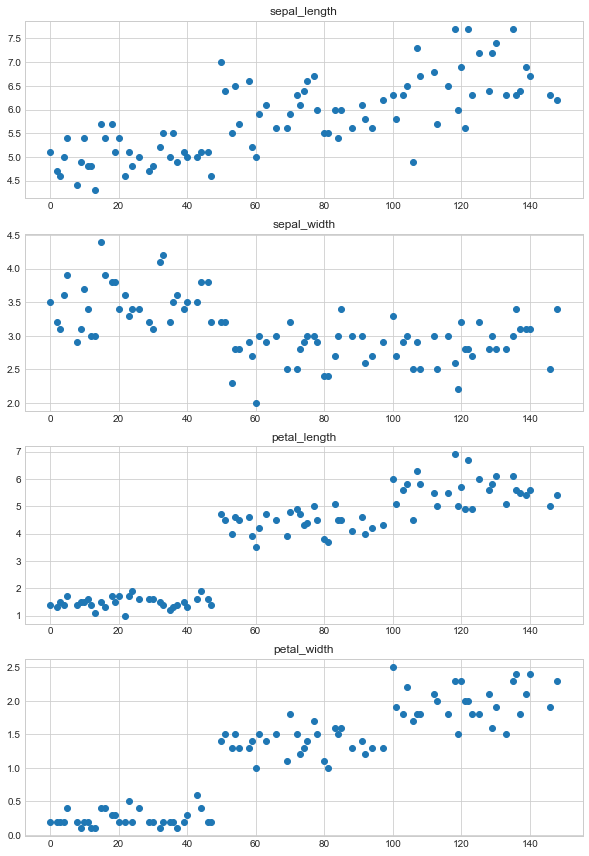

In [56]:
fig, ax = plt.subplots(4,1)
fig.set_size_inches(10,15)
for i, feat in enumerate(X_train.columns):
    ax[i].scatter(X_train.index, X_train[feat])
    ax[i].set_title(feat)

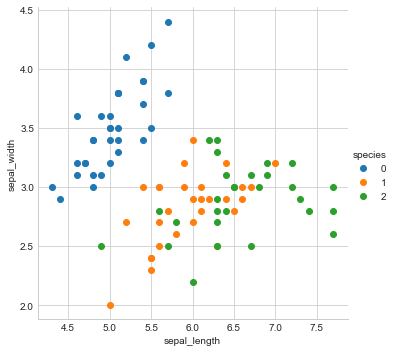

In [77]:
sns.FacetGrid(df_train, hue="species", size=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

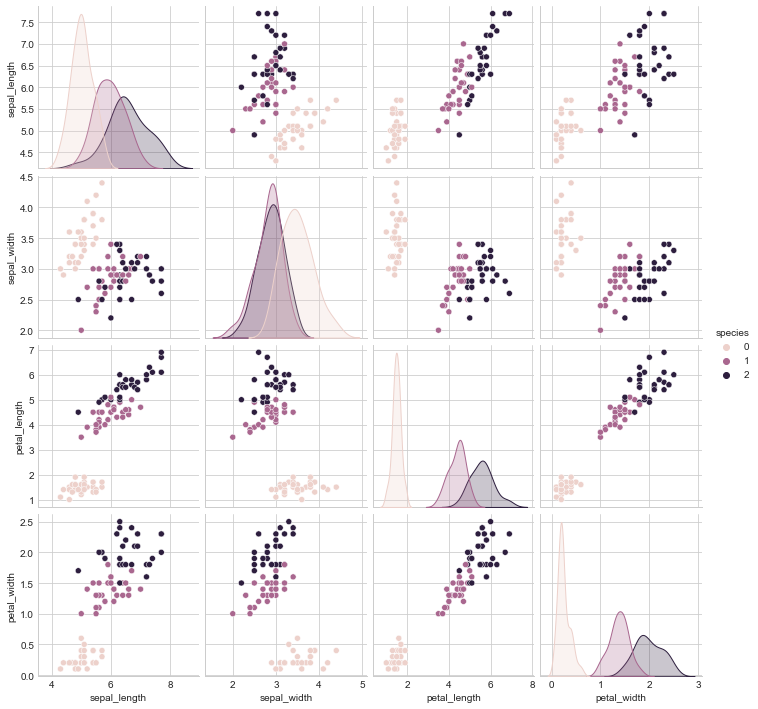

In [79]:
sns.pairplot(df_train, hue = 'species')

In [59]:
forest = RandomForestClassifier().fit(X_train, y_train)

In [85]:
y_pred_forest = forest.predict(X_val)
print('basic forest model')
print(f'MSE: {np.sqrt(mean_squared_error(y_val,y_pred_forest))}')
print(f'r2_score: {r2_score(y_val, y_pred_forest)}')
print(f'train set scoring: {forest.score(X_train, y_train)}')
print(f'validation set scoring: {forest.score(X_val, y_val)}')

basic forest model
MSE: 0.18257418583505536
r2_score: 0.9523052464228935
train set scoring: 1.0
validation set scoring: 0.9666666666666667


In [86]:
knn = KNeighborsClassifier().fit(X_train, y_train)

In [87]:
y_pred_knn = knn.predict(X_val)
print('basic knn model')
print(f'MSE: {np.sqrt(mean_squared_error(y_val,y_pred_knn))}')
print(f'r2_score: {r2_score(y_val, y_pred_knn)}')
print(f'train set scoring: {knn.score(X_train, y_train)}')
print(f'validation set scoring: {knn.score(X_val, y_val)}')

basic knn model
MSE: 0.18257418583505536
r2_score: 0.9523052464228935
train set scoring: 0.9444444444444444
validation set scoring: 0.9666666666666667


In [91]:
y_test_knn = knn.predict(X_test)
print('basic knn model on test set')
print(f'MSE: {np.sqrt(mean_squared_error(y_test,y_test_knn))}')
print(f'r2_score: {r2_score(y_test, y_test_knn)}')
print(f'test set scoring: {knn.score(X_test, y_test)}')

basic knn model on test set
MSE: 0.18257418583505536
r2_score: 0.9427480916030534
test set scoring: 0.9666666666666667


In [92]:
y_test_forest = forest.predict(X_test)
print('basic knn model on test set')
print(f'MSE: {np.sqrt(mean_squared_error(y_test,y_test_forest))}')
print(f'r2_score: {r2_score(y_test, y_test_forest)}')
print(f'test set scoring: {knn.score(X_test, y_test)}')

basic knn model on test set
MSE: 0.0
r2_score: 1.0
test set scoring: 0.9666666666666667
